In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('waterQuality1.csv')
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values


In [ ]:
print(x)

[[1.65 '9.08' 0.04 ... 0.08 0.34 0.02]
 [2.32 '21.16' 0.01 ... 0.08 0.27 0.05]
 [1.01 '14.02' 0.04 ... 0.07 0.44 0.01]
 ...
 [0.09 '6.85' 0.0 ... 0.0 0.04 0.05]
 [0.01 '10' 0.01 ... 0.0 0.0 0.0]
 [0.04 '6.85' 0.01 ... 0.0 0.04 0.05]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [ ]:
print(y)

['1' '1' '0' ... '1' '1' '1']


In [ ]:
print(x)

[[1.65 '9.08' 0.04 ... 0.08 0.34 0.02]
 [2.32 '21.16' 0.01 ... 0.08 0.27 0.05]
 [1.01 '14.02' 0.04 ... 0.07 0.44 0.01]
 ...
 [0.09 '6.85' 0.0 ... 0.0 0.04 0.05]
 [0.01 '10' 0.01 ... 0.0 0.0 0.0]
 [0.04 '6.85' 0.01 ... 0.0 0.04 0.05]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Ensure all relevant columns are numeric, coercing errors to NaN
# Assuming the first column is the one causing issues and needs encoding,
# but converting all columns to numeric is a safer general approach
for col in dataset.columns[:-1]: # Exclude the target variable column
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Separate features (x) and target (y) again after cleaning
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# Impute missing values in x
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_imputed = imputer.fit_transform(x)


# Apply OneHotEncoder to the first column and pass through the rest
# The first column was already identified as potentially requiring encoding based on previous attempts.
# Ensure the index [0] corresponds to the column needing one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x_encoded = ct.fit_transform(x_imputed)

# Convert the sparse matrix to dense if necessary (OneHotEncoder outputs sparse by default)
if hasattr(x_encoded, 'toarray'):
    x = x_encoded.toarray()
else:
    x = x_encoded # Already dense

print(x)

[[0.   0.   0.   ... 0.08 0.34 0.02]
 [0.   0.   0.   ... 0.08 0.27 0.05]
 [0.   0.   0.   ... 0.07 0.44 0.01]
 ...
 [0.   0.   0.   ... 0.   0.04 0.05]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.04 0.05]]


In [ ]:
print(x)

[[0.   0.   0.   ... 0.08 0.34 0.02]
 [0.   0.   0.   ... 0.08 0.27 0.05]
 [0.   0.   0.   ... 0.07 0.44 0.01]
 ...
 [0.   0.   0.   ... 0.   0.04 0.05]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.04 0.05]]


In [ ]:
print(y)

['1' '1' '0' ... '1' '1' '1']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[2 2 1 ... 2 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Apply feature scaling to all columns in the training and testing sets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6399, 514)
x_test shape: (1600, 514)
y_train shape: (6399,)
y_test shape: (1600,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Ensure all relevant columns are numeric, coercing errors to NaN
for col in x.columns:
    x[col] = pd.to_numeric(x[col], errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_imputed = imputer.fit_transform(x)

# Apply OneHotEncoder to the first column and pass through the rest
# The first column was already identified as potentially requiring encoding based on previous attempts.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x_encoded = ct.fit_transform(x_imputed)

# Convert the sparse matrix to dense if necessary (OneHotEncoder outputs sparse by default)
if hasattr(x_encoded, 'toarray'):
    x_dense = x_encoded.toarray()
else:
    x_dense = x_encoded # Already dense

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_dense, y, test_size=0.2, random_state=1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6399, 514)
x_test shape: (1600, 514)
y_train shape: (6399,)
y_test shape: (1600,)


In [ ]:
print(x_train)

[[-0.17634891 -0.27106753 -0.2657141  ...  0.3565099  -0.89201178
   0.56275943]
 [-0.17634891 -0.27106753 -0.2657141  ...  1.39804401  0.15052957
   0.93542813]
 [-0.17634891 -0.27106753 -0.2657141  ...  0.00933187 -0.47499524
   0.19009074]
 ...
 [-0.17634891 -0.27106753  3.76344352 ... -1.72655831 -0.544498
  -0.92791535]
 [-0.17634891 -0.27106753 -0.2657141  ... -1.72655831  2.23561226
   1.30809682]
 [-0.17634891 -0.27106753  3.76344352 ...  0.3565099  -0.40549248
  -0.92791535]]


In [ ]:
print(x_test)

[[0.   0.   0.   ... 0.09 0.05 0.02]
 [0.   0.   0.   ... 0.04 0.09 0.07]
 [0.   0.   0.   ... 0.05 0.03 0.05]
 ...
 [0.   0.   0.   ... 0.08 0.09 0.07]
 [0.   0.   0.   ... 0.06 0.18 0.03]
 [0.   0.   0.   ... 0.03 0.   0.05]]


In [ ]:
print(y_train)

5418    0
255     1
5669    0
1882    0
6631    0
       ..
7935    0
5192    0
3980    1
235     1
5157    0
Name: is_safe, Length: 6399, dtype: object


In [ ]:
print(y_test)

4739    0
5605    0
5495    0
4205    0
3228    0
       ..
4606    0
3474    0
5055    0
674     1
6011    0
Name: is_safe, Length: 1600, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [ ]:
print(x_train)


[[-0.17634891 -0.27106753 -0.2657141  ...  0.3565099  -0.89201178
   0.56275943]
 [-0.17634891 -0.27106753 -0.2657141  ...  1.39804401  0.15052957
   0.93542813]
 [-0.17634891 -0.27106753 -0.2657141  ...  0.00933187 -0.47499524
   0.19009074]
 ...
 [-0.17634891 -0.27106753  3.76344352 ... -1.72655831 -0.544498
  -0.92791535]
 [-0.17634891 -0.27106753 -0.2657141  ... -1.72655831  2.23561226
   1.30809682]
 [-0.17634891 -0.27106753  3.76344352 ...  0.3565099  -0.40549248
  -0.92791535]]


In [ ]:
print(x_test)

[[-0.17634891 -0.27106753 -0.2657141  ...  1.39804401 -0.68350351
  -0.92791535]
 [-0.17634891 -0.27106753 -0.2657141  ... -0.33784617 -0.40549248
   0.93542813]
 [-0.17634891 -0.27106753 -0.2657141  ...  0.00933187 -0.82250902
   0.19009074]
 ...
 [-0.17634891 -0.27106753 -0.2657141  ...  1.05086597 -0.40549248
   0.93542813]
 [-0.17634891 -0.27106753 -0.2657141  ...  0.3565099   0.22003232
  -0.55524665]
 [-0.17634891 -0.27106753 -0.2657141  ... -0.6850242  -1.03101729
   0.19009074]]


First 5 rows of data:
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  s

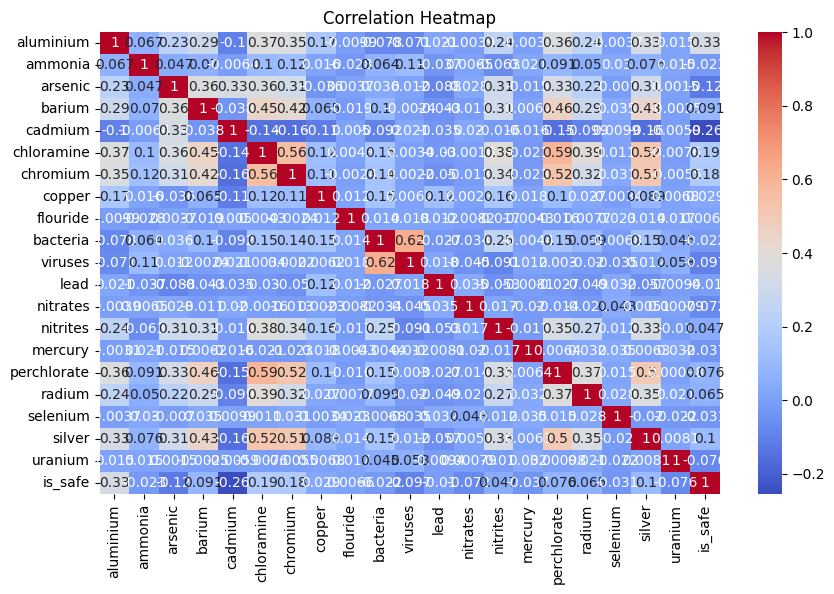

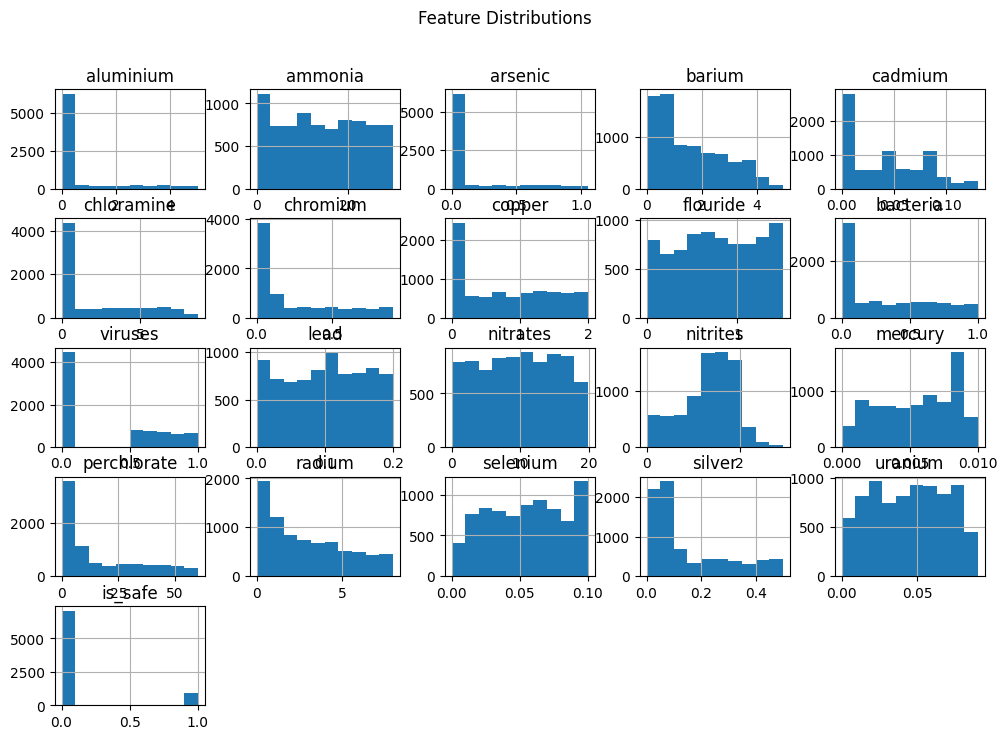


Data after transformation:
   aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium 

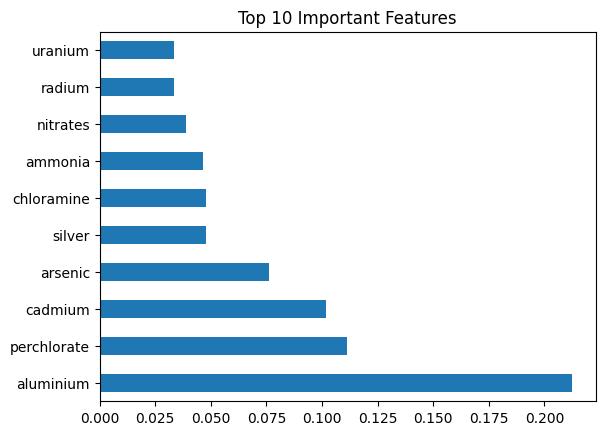


Model Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1400
         1.0       0.97      0.70      0.82       200

    accuracy                           0.96      1600
   macro avg       0.97      0.85      0.90      1600
weighted avg       0.96      0.96      0.96      1600



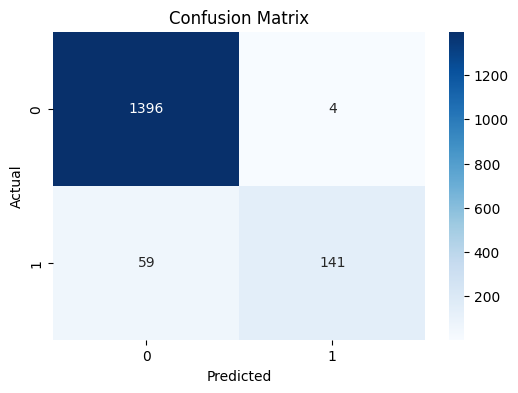

In [2]:
# Week 2 – Machine Learning Model with EDA, Transformation, Feature Selection, and Accuracy

# ===========================
# 1. Import Libraries
# ===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification problems
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===========================
# 2. Load Dataset
# ===========================
# Replace with your actual dataset name
data = pd.read_csv('/content/waterQuality1 (1).csv')
print("First 5 rows of data:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Convert 'ammonia' and 'is_safe' columns to numeric, coercing errors
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')

# Drop rows where 'ammonia' is NaN (which resulted from coercion)
data.dropna(subset=['ammonia'], inplace=True)

# ===========================
# 3. Exploratory Data Analysis (EDA)
# ===========================
print("\nChecking for missing values:")
print(data.isnull().sum())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize distributions
data.hist(figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

# ===========================
# 4. Data Transformation
# ===========================
# Fill missing values (example: using mean for numeric)
data = data.fillna(data.mean())

# Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

print("\nData after transformation:")
print(data.head())

# ===========================
# 5. Feature Selection
# ===========================
# Replace 'target_column' with your actual target variable name
target = 'is_safe' # Updated target column name
X = data.drop(target, axis=1)
y = data[target]

# Quick feature importance using Random Forest
temp_model = RandomForestClassifier(random_state=42)
temp_model.fit(X, y)
feature_importances = pd.Series(temp_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# ===========================
# 6. Model Training
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ===========================
# 7. Accuracy Evaluation
# ===========================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()